In [1]:
import pandas as pd

In [2]:
spam = pd.read_csv('spam.csv')

In [3]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#Normalize = True returns a percentage
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


Clean the text and create 3 sets of words.
- The words that appear in legitimate text messages.
- The words that appear in spam text messages.
- All of the words.

In [9]:
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd

def basic_clean(text):
    text = (unicodedata.normalize('NFKD', text.lower())
        .encode('ascii', 'ignore')
        .decode('utf-8', 'ignore') )
    return re.sub(r"[^a-z0-9'\s]", '', text)

In [10]:
df['text_cleaned'] = df.text.apply(basic_clean)
df.head()

,label,text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...


In [11]:
def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str=True)
    
    return string

In [12]:
df['text_tokenized'] = df.text_cleaned.apply(tokenize)
df.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...


In [13]:
def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    
    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

In [14]:
df['text_lemmatized'] = df.text_tokenized.apply(lemmatize)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...


In [16]:
def remove_stopwords(string, extra_words=[], exclude_words=[]):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)

    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))
    
    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

In [17]:
df['text_filtered'] = df.text_lemmatized.apply(remove_stopwords)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though


**Add a column with list of words**

In [22]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]

# column name will be words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]"


**Exploring all the words together, Not by document**
- any common words that you're missing from the stopword list...noise that is still in your data.
- common words that are spelled differently across the documents
- Are there words more common in spam than ham? vice versa?
**Exploring documents**
- exploring n-grams, phrases. bi-grams are 2-word phrases, tri-grams are 3-word phrases, ...

To finalize prep for exploration:

1. add a feature that is the length of each document.
2. build a set of ham_words and spam_words to explore.

In [102]:
# ham_words = ' '.join(df[df.label == 'ham'].text_filtered)
# ham_words

In [32]:
spam_words = ' '.join(df[df.label=='spam'].text_filtered)
all_words = ' '.join(df.text_filtered)
ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)
spam_words

"free entrywkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcapply 08452810075over18freemsg hey darling3 weekword backlike fun still tb ok xxx std chgs send i12150 rcv winner valued network customer selected receivea i12900 prize reward claim call 09061701461 claim code kl341 valid 12 hour mobile 11 monthr entitled update latest colour mobile camera free call mobile update co free 08002986030 six chance win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6days 16 tsandcs apply reply hlinfo urgentweek free membership i12100000 prize jackpot txt word claim 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt message click httpwap xxxmobilemovieclubcomnqjkgighjjgcbl englandmacedonia dont miss goalsteam news txt ur national team 87077 eg england 87077 trywales scotland 4txti14120 poboxox36504w45wq 16 thanks subscription ringtone uk mobile charged i125month please confirm replying yes repl

In [26]:
ham_words.split()

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugisgreat',
 'world',
 'labuffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wifonidun',
 'say',
 'early',
 'horc',
 'already',
 'say',
 'nahthink',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'requestmelle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettamha',
 'set',
 'callertune',
 'caller',
 'presscopy',
 'friend',
 'callertunegonna',
 'home',
 'soonwant',
 'talk',
 'stuff',
 'anymore',
 "tonight'",
 'cried',
 'enough',
 'todaysearching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'kiwatching',
 'ehrememberspell',
 'name',
 'yesnaughty',
 'makewet',
 'fine',
 'thati12i12s',
 'wayfeel',
 'thati12i12s',
 'way',
 'gotaseriously',
 'spell',
 'name',
 'ii12i12i12m',
 'going',
 'tr

In [27]:
ham_freq = pd.Series(ham_words.split()).value_counts()

In [28]:
spam_freq = pd.Series(spam_words.split()).value_counts()

In [29]:
spam_freq.head()

call    342
free    189
txt     140
text    128
ur      125
dtype: int64

In [33]:
all_freq = pd.Series(all_words.split()).value_counts()
all_freq.head()

call    500
ur      340
get     328
ltgt    241
go      233
dtype: int64

In [34]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )
word_counts.head()

,all,ham,spam
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
01223585334,2,0,2


In [35]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,ham,spam
call,500,159,342
ur,340,217,125
get,328,255,72
ltgt,241,241,0
go,233,205,27
free,230,40,189
day,219,197,20
wa,217,207,9
ok,215,209,5
good,214,202,12


In [36]:
word_counts[word_counts.spam==0].sort_values(by='ham').tail(5)

,all,ham,spam
i12,92,91,0
da,112,112,0
later,114,112,0
lor,120,120,0
ltgt,241,241,0


In [37]:
word_counts[word_counts.ham==0].sort_values(by='spam').tail(10)

,all,ham,spam
i122000,28,0,28
150ppm,30,0,32
i121000,33,0,33
awarded,38,0,38
18,41,0,41
guaranteed,50,0,50
tone,60,0,60
nokia,62,0,62
prize,80,0,80
claim,96,0,96


# Document Word Count

- The length of documents is often a good feature

In [38]:
len(df.words[0])

12

In [39]:

df['doc_length'] = [len(wordlist) for wordlist in df.words]

In [40]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",20
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]",6


In [42]:
df = df[df.doc_length!=0]

# Visualize

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of Spam vs. Ham for the 20 most common words in our text sample')

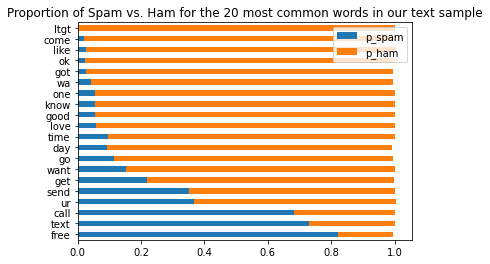

In [48]:
# visualize the percentage of the term in ham vs. spam

(word_counts.assign(p_spam = word_counts.spam/word_counts['all'],
                  p_ham = word_counts.ham/word_counts['all'])
.sort_values(by='all')[['p_spam', 'p_ham']]
.tail(20)
.sort_values('p_ham')
.plot.barh(stacked=True)
)

plt.title("Proportion of Spam vs. Ham for the 20 most common words in our text sample")

In [49]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

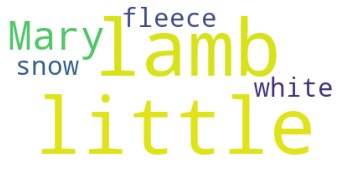

In [50]:
sentence = 'Mary had a little lamb, little lamb, little lamb. Its fleece was white as snow.'

img = WordCloud(background_color='white').generate(sentence)
plt.imshow(img)

plt.axis('off')

In [51]:
ham_cloud = WordCloud(background_color='pink', height=800, width=800).generate(ham_words)

In [52]:
spam_cloud = WordCloud(background_color='pink', height=800, width=800).generate(spam_words)

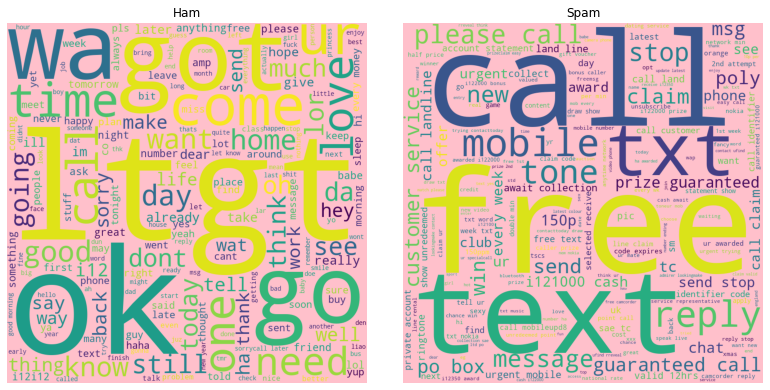

In [53]:
plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title("Ham")
axs[1].set_title("Spam")

for ax in axs: ax.axis('off')

# Bigrams

In [54]:
sentence
bigrams = nltk.ngrams(sentence.split(), 2)
list(bigrams)

[('Mary', 'had'),
 ('had', 'a'),
 ('a', 'little'),
 ('little', 'lamb,'),
 ('lamb,', 'little'),
 ('little', 'lamb,'),
 ('lamb,', 'little'),
 ('little', 'lamb.'),
 ('lamb.', 'Its'),
 ('Its', 'fleece'),
 ('fleece', 'was'),
 ('was', 'white'),
 ('white', 'as'),
 ('as', 'snow.')]

In [58]:
df['bigrams'] = [list(nltk.ngrams(df.words[0], 2)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12,"[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4,"[(go, jurong), (jurong, point), (point, crazy)..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",20,"[(go, jurong), (jurong, point), (point, crazy)..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7,"[(go, jurong), (jurong, point), (point, crazy)..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]",6,"[(go, jurong), (jurong, point), (point, crazy)..."


In [61]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20)
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)
spam_bigrams

(please, call)          43
(customer, service)     27
(guaranteed, call)      23
(po, box)               23
(prize, guaranteed)     22
(i121000, cash)         20
(send, stop)            19
(every, week)           19
(land, line)            18
(await, collection)     18
(urgent, mobile)        18
(valid, 12hrs)          17
(account, statement)    16
(claim, call)           16
(sae, tc)               16
(call, mobileupd8)      15
(call, customer)        15
(identifier, code)      15
(call, 08000930705)     15
(selected, receive)     15
dtype: int64

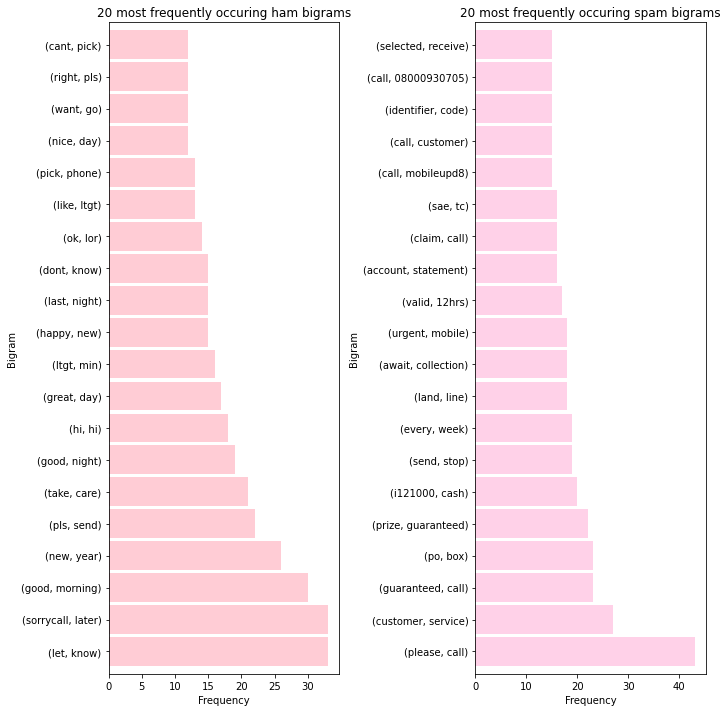

In [66]:
plt.subplot(121)

ham_bigrams.plot.barh(color='pink', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')


plt.subplot(122)
spam_bigrams.plot.barh(color='hotpink', width=.9, figsize=(10, 10), alpha=.3)
plt.title('20 most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

**Word cloud of bigrams**

# Exercises

- 1. **Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.**

In [67]:
df['trigrams'] = [list(nltk.ngrams(df.words[0], 3)) for wordlist in df.words]


In [68]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length,bigrams,trigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12,"[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4,"[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",20,"[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7,"[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]",6,"[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ..."


In [72]:
#Split it into 3 words
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(20)
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(20)
spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(reply, call, 08000930705)             13
(2003, account, statement)             13
(private, 2003, account)               13
(camcorder, reply, call)               12
(guaranteed, i121000, cash)            12
(show, 800, unredeemed)                12
(bonus, caller, prize)                 11
(anytime, network, min)                11
(every, week, txt)                     11
(cash, await, collection)              10
(please, call, customer)               10
(customer, service, representative)    10
(i122000, bonus, caller)               10
(mob, every, week)                      9
(free, 1st, week)                       9
(urgent, mobile, number)                9
(toneur, mob, every)                    9
dtype: int64

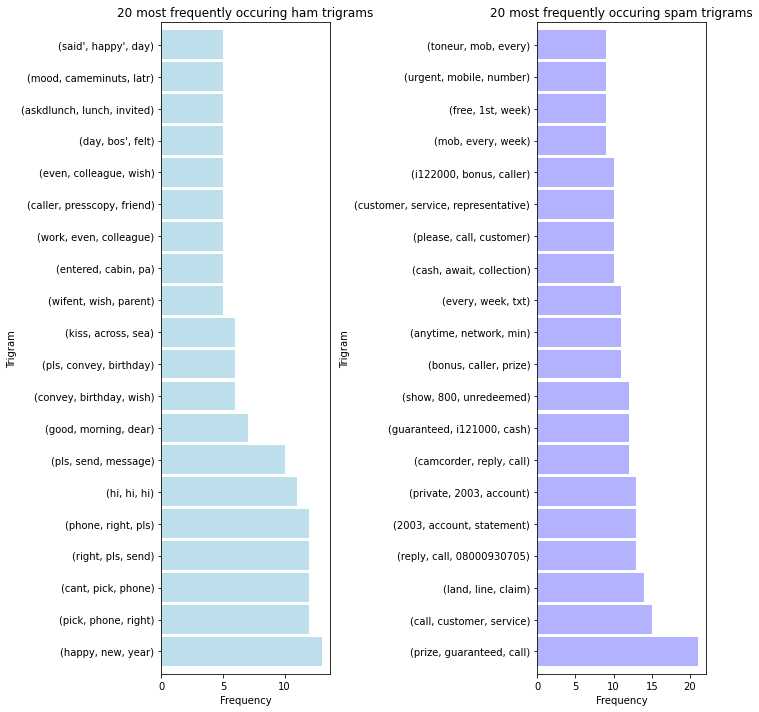

In [73]:
plt.subplot(121)

ham_trigrams.plot.barh(color='lightblue', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occuring ham trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')


plt.subplot(122)
spam_trigrams.plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=.3)
plt.title('20 most frequently occuring spam trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

In [74]:
# Appears that keywords like prize, guaranteed, call, customer, service would all be good words to add as features.

2. Explore the blog articles using the techniques discussed in the exploration lesson.



In [75]:
from acquire import get_blog_articles

In [76]:
df = get_blog_articles()

In [78]:
df = pd.DataFrame(df)

In [79]:
df.head()

,title,content
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...


In [85]:
def basic_clean(sentence):
    string = sentence.lower()
    string = unicodedata.normalize('NFKD', string)\
    .encode('ascii', 'ignore')\
    .decode('utf-8', 'ignore')
    string = re.sub(r"[^a-z0-9'\s]", '', string)
    return string 

In [86]:
df['clean'] = df['content'].apply(lambda x: basic_clean(x))

In [90]:
def stem(text):
    ps = nltk.porter.PorterStemmer()
    stems = [ps.stem(word) for word in text.split()]
    article_stemmed = ' '.join(stems)
    return article_stemmed

In [91]:
df['stemmed'] = df['content'].apply(lambda x: stem(x))

In [92]:
df.head()

,title,content,clean,text_tokenized,stemmed
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumors are true the time has arrived codeu...,NaN,the rumor are true! the time ha arrived. codeu...
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoniou and maggie giust\ndata sci...,NaN,By dimitri antoni and maggi giust data science...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoniou\na week ago codeup launche...,NaN,"By dimitri antoni A week ago, codeup launch ou..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair\nthe third biannual san anton...,NaN,SA tech job fair the third bi-annu san antonio...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps are closing is the model ...,NaN,competitor bootcamp are closing. Is the model ...


In [93]:
df.drop(columns='text_tokenized', inplace=True)

In [94]:
df.head()

,title,content,clean,stemmed
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumors are true the time has arrived codeu...,the rumor are true! the time ha arrived. codeu...
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoniou and maggie giust\ndata sci...,By dimitri antoni and maggi giust data science...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoniou\na week ago codeup launche...,"By dimitri antoni A week ago, codeup launch ou..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair\nthe third biannual san anton...,SA tech job fair the third bi-annu san antonio...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps are closing is the model ...,competitor bootcamp are closing. Is the model ...


In [95]:
def lemmatize(text):
    wnl = nltk.stem.WordNetLemmatizer()
    lemmas = [wnl.lemmatize(word) for word in text.split()]
    article_lemmatized = ' '.join(lemmas)
    return article_lemmatized

In [96]:
df['lemmatized'] = df['content'].apply(lambda x: lemmatize(x))

In [97]:
df.head()

,title,content,clean,stemmed,lemmatized
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumors are true the time has arrived codeu...,the rumor are true! the time ha arrived. codeu...,The rumor are true! The time ha arrived. Codeu...
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoniou and maggie giust\ndata sci...,By dimitri antoni and maggi giust data science...,By Dimitri Antoniou and Maggie Giust Data Scie...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoniou\na week ago codeup launche...,"By dimitri antoni A week ago, codeup launch ou...","By Dimitri Antoniou A week ago, Codeup launche..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair\nthe third biannual san anton...,SA tech job fair the third bi-annu san antonio...,SA Tech Job Fair The third bi-annual San Anton...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps are closing is the model ...,competitor bootcamp are closing. Is the model ...,Competitor Bootcamps Are Closing. Is the Model...


In [98]:
def remove_stopwords(string, extra_words=[], exclude_words=[]):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)

    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))
    
    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

In [99]:
df['text_filtered'] = df.lemmatized.apply(remove_stopwords)
df.head()

,title,content,clean,stemmed,lemmatized,text_filtered
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumors are true the time has arrived codeu...,the rumor are true! the time ha arrived. codeu...,The rumor are true! The time ha arrived. Codeu...,The rumor true! The time ha arrived. Codeup ha...
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoniou and maggie giust\ndata sci...,By dimitri antoni and maggi giust data science...,By Dimitri Antoniou and Maggie Giust Data Scie...,"By Dimitri Antoniou Maggie Giust Data Science,..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoniou\na week ago codeup launche...,"By dimitri antoni A week ago, codeup launch ou...","By Dimitri Antoniou A week ago, Codeup launche...","By Dimitri Antoniou A week ago, Codeup launche..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair\nthe third biannual san anton...,SA tech job fair the third bi-annu san antonio...,SA Tech Job Fair The third bi-annual San Anton...,SA Tech Job Fair The third bi-annual San Anton...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps are closing is the model ...,competitor bootcamp are closing. Is the model ...,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is Model Dan...


**Add a column with a list of words**

In [100]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]

# column name will be words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)
df.head()

,title,content,clean,stemmed,lemmatized,text_filtered,words
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumors are true the time has arrived codeu...,the rumor are true! the time ha arrived. codeu...,The rumor are true! The time ha arrived. Codeu...,The rumor true! The time ha arrived. Codeup ha...,"[he, rumor, true, he, time, ha, arrived, odeup..."
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoniou and maggie giust\ndata sci...,By dimitri antoni and maggi giust data science...,By Dimitri Antoniou and Maggie Giust Data Scie...,"By Dimitri Antoniou Maggie Giust Data Science,...","[y, imitri, ntoniou, aggie, iust, ata, cience,..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoniou\na week ago codeup launche...,"By dimitri antoni A week ago, codeup launch ou...","By Dimitri Antoniou A week ago, Codeup launche...","By Dimitri Antoniou A week ago, Codeup launche...","[y, imitri, ntoniouweek, ago, odeup, launched,..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair\nthe third biannual san anton...,SA tech job fair the third bi-annu san antonio...,SA Tech Job Fair The third bi-annual San Anton...,SA Tech Job Fair The third bi-annual San Anton...,"[ech, ob, air, he, third, biannual, an, ntonio..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps are closing is the model ...,competitor bootcamp are closing. Is the model ...,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is Model Dan...,"[ompetitor, ootcamps, re, losing, s, odel, ang..."


In [110]:
all_words = ' '.join(df.text_filtered)


In [111]:
all_freq = pd.Series(all_words).value_counts()


In [112]:
all_freq.head(10)

The rumor true! The time ha arrived. Codeup ha officially opened application new Data Science career accelerator, 25 seat available! This immersive program one kind San Antonio, help land job Glassdoor’s #1 Best Job America. Data Science method providing actionable intelligence data. The data revolution ha hit San Antonio, resulting explosion Data Scientist position across company like USAA, Accenture, Booz Allen Hamilton, HEB. We’ve even seen UTSA invest $70 M Cybersecurity Center School Data Science. We built program specifically meet growing demand industry. Our program 18 week long, full-time, hands-on, project-based. Our curriculum development instruction led Senior Data Scientist, Maggie Giust, ha worked HEB, Capital Group, Rackspace, along input dozen practitioner hiring partners. Students work real data sets, realistic problems, entire data science pipeline collection deployment. They receive professional development training resume writing, interviewing, continuing education p

In [113]:
import re
import unicodedata
import pandas as pd
import nltk

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [114]:
new_df = get_blog_articles()

In [115]:
new_df = pd.DataFrame(new_df)

In [116]:
new_df.head()

,title,content
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...


In [117]:
all_words = clean(' '.join(df.content))


In [118]:
all_freq = pd.Series(all_words).value_counts()


In [120]:
all_freq.head(10)

data         75
science      26
company      20
learning     20
job          14
machine      14
scientist    13
like         12
model        12
education    10
dtype: int64

In [121]:
new_df.title.value_counts()

Data Science VS Data Analytics: What’s The Difference? - Codeup       1
10 Tips to Crush It at the SA Tech Job Fair - Codeup                  1
Data Science Myths - Codeup                                           1
Codeup’s Data Science Career Accelerator is Here! - Codeup            1
Competitor Bootcamps Are Closing. Is the Model in Danger? - Codeup    1
Name: title, dtype: int64

In [122]:
freq = pd.DataFrame(all_freq)

In [123]:
freq.head()

,0
data,75
science,26
company,20
learning,20
job,14


In [126]:
freq.rename(columns={0: 'count'}, inplace=True)

In [127]:
freq.head()

,count
data,75
science,26
company,20
learning,20
job,14


In [129]:
freq.sort_values(by='count', ascending=False)



,count
data,75
science,26
company,20
learning,20
job,14
machine,14
scientist,13
like,12
model,12
education,10


<AxesSubplot:>

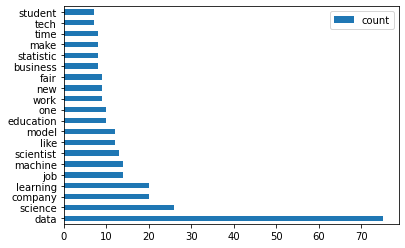

In [133]:
freq.sort_values(by='count', ascending=False).head(20).plot.barh(stacked=False)


In [138]:
sentence = " ".join(all_words)


(-0.5, 399.5, 199.5, -0.5)

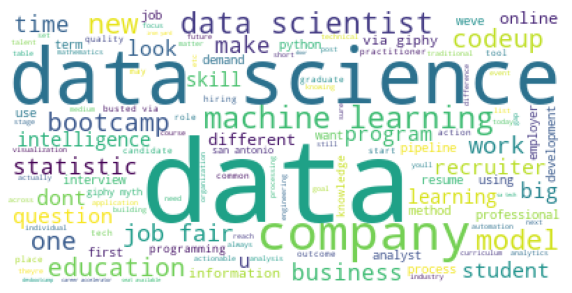

In [140]:
plt.figure(figsize=(10, 8))

img = WordCloud(background_color='white').generate(sentence)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

In [141]:
from acquire import get_news_articles

In [142]:
news = get_news_articles()

In [143]:
df = pd.DataFrame(news)

In [144]:
df.head()

,title,content,category
0,Scientist behind '90% effective' COVID-19 vacc...,"German scientist Uğur Şahin, the CEO of BioNTe...",Business
1,IPL is ready for expansion: NCA head Rahul Dra...,"Former India captain Rahul Dravid, who is now ...",Sports
2,"Something bogus going on: Musk on 2 +ve, 2 -ve...",Billionaire Elon Musk said he took four rapid ...,Technology
3,Friends reunion being rescheduled for beginnin...,"Actor Matthew Perry, who played the role of Ch...",Entertainment


In [145]:
business_words = clean(' '.join(df[df.category == 'Business'].content))
sports_words = clean(' '.join(df[df.category == 'Sports'].content))
tech_words = clean(' '.join(df[df.category == 'Technology'].content))
entertainment_words = clean(' '.join(df[df.category == 'Entertainment'].content))
all_words = clean(' '.join(df.content))

In [146]:
business_freq = pd.Series(business_words).value_counts()
sports_freq = pd.Series(sports_words).value_counts()
tech_freq = pd.Series(tech_words).value_counts()
entertainment_freq = pd.Series(entertainment_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [152]:
all_freq.head(10)

said           5
reunion        3
dravid         2
pandemic       2
test           2
vaccine        2
friend         2
ipl            2
coronavirus    2
thursday       2
dtype: int64

In [153]:
word_counts = (pd.concat([all_freq, business_freq, sports_freq, tech_freq, entertainment_freq ], axis=1, sort=True)
                .set_axis(['all', 'business', 'sports', 'tech', 'entertainment'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,business,sports,tech,entertainment
2021,1,0,1,0,0
90,1,1,0,0,0
academy,1,0,1,0,0
actor,1,0,0,0,1
added,2,0,2,0,0


In [154]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,business,sports,tech,entertainment
said,5,2,1,2,0
reunion,3,0,0,0,3
tweeted,2,0,0,1,1
dravid,2,0,2,0,0
sahin,2,2,0,0,0
musk,2,0,0,2,0
friend,2,0,0,0,2
coronavirus,2,1,0,0,1
symptom,2,0,0,2,0
team,2,0,2,0,0
